<a href="https://colab.research.google.com/github/aditya8075/Bank-Marketing-Effectiveness-Prediction--Supervised-machne-learning--Classification/blob/main/Aditya_Tadas_Bank_marketing_effctiveness_prediction_classification_project_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Project Title : Predicting the effectiveness of bank marketing campaigns

Problem Description
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
#importing libraries for data manipulation and visualization
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing libraries for data manipulation and visualization
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#reading csv file
bank_df = pd.read_csv('/content/drive/MyDrive/bank-full.csv', encoding='utf-8', delimiter=";")

In [5]:
#head of dataset
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#finding out how many rown and columns in our dataset
bank_df.shape

(45211, 17)

In [7]:
#name of columns in our dataset
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
#cheking null values in dataset
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
#cheaking the duplicates values

bank_df.duplicated().sum()

0

In [10]:
#cheaking how many numeric and categorical varible in dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
#cheking statistics of dataset
bank_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [12]:
#lets see the catagorical columns and Integers

catvar=bank_df.select_dtypes(include=['object']).columns
numvar=bank_df.select_dtypes(include=['int32','int64','float32','float64']).columns
print(catvar)
print(numvar)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [13]:
bank_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Univarient Analysis Of catagorical variables

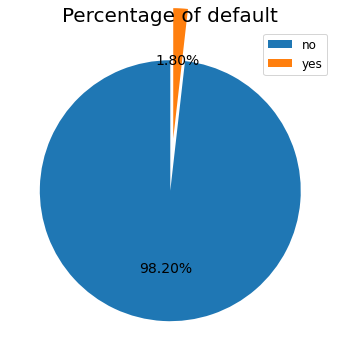

In [14]:
#pie chart for percentage of credit default
plt.figure(figsize=(7,6))
labels = bank_df['default'].value_counts().index.tolist()
sizes = bank_df['default'].value_counts().tolist()
explode = (0, 0.4)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of default', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 12})

Conclusion
1. From above pie chart 98.20 % clients have not any credit default only 1.80% of clients have default in credit.

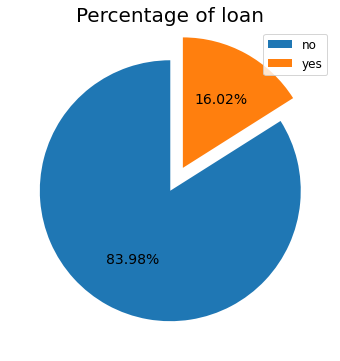

In [15]:
#pic chart for visualising percentage of clients having persinal loan
plt.figure(figsize=(7,6))
labels = bank_df['loan'].value_counts().index.tolist()
sizes = bank_df['loan'].value_counts().tolist()
explode = (0, 0.2)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of loan', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 12})

Conclusion
1. 83.98 % of clients having personal load and 16.02 % clients have not any personal loan.

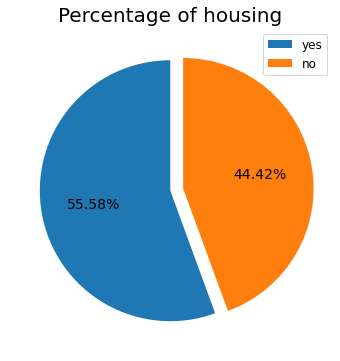

In [16]:
#pie chart for visualizing what percentage of clients having housing loan
plt.figure(figsize=(7,6))
labels = bank_df['housing'].value_counts().index.tolist()
sizes = bank_df['housing'].value_counts().tolist()
explode = (0, 0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of housing', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 12})

Conclusion
1. 55.58 % of clients having housing loan and 44.42 % of clients doesnot having any housing loan

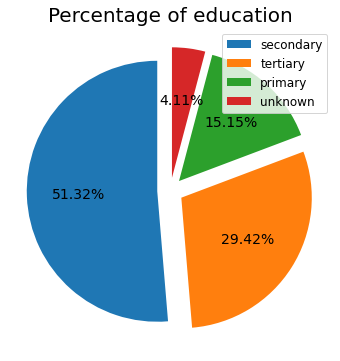

In [17]:
# pie chart for visualising percentage of education category of clients
plt.figure(figsize=(7,6))
labels = bank_df['education'].value_counts().index.tolist()
sizes = bank_df['education'].value_counts().tolist()
explode = (0.1, 0.1,0.1,0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of education', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 12})

Conclusion
1. 51.32 % of clients are in the category of secondary education.
2. % of clients who are in the category of primary education(15.15%) is very less 

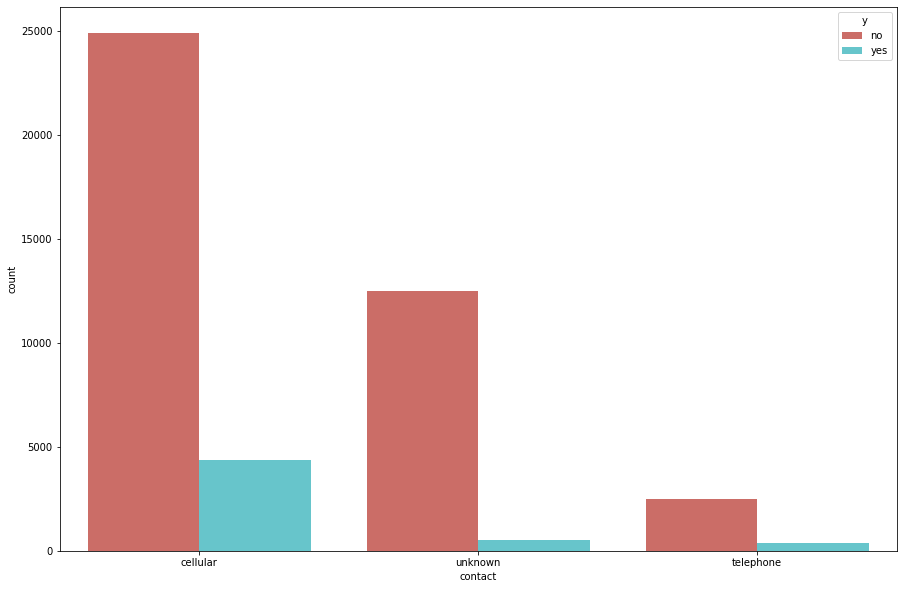

In [18]:
#histplot for visualising contact and suscribe deposite or not
plt.figure(figsize=(15,10))
sns.countplot(x='contact',hue='y', data=bank_df,order=bank_df['contact'].value_counts().index,palette="hls")
plt.show()

Conclusion 
1. From the above coutplot we can conclude that when contact communication type is callular
   then there is high possibility that the client suscribe a term deposite hence the bank should 
   contact the customer by cellular type mostly.
  
 
2. when the contact communication type is telephone then there was very less possibility that the 
   client suscribe a term deposite.

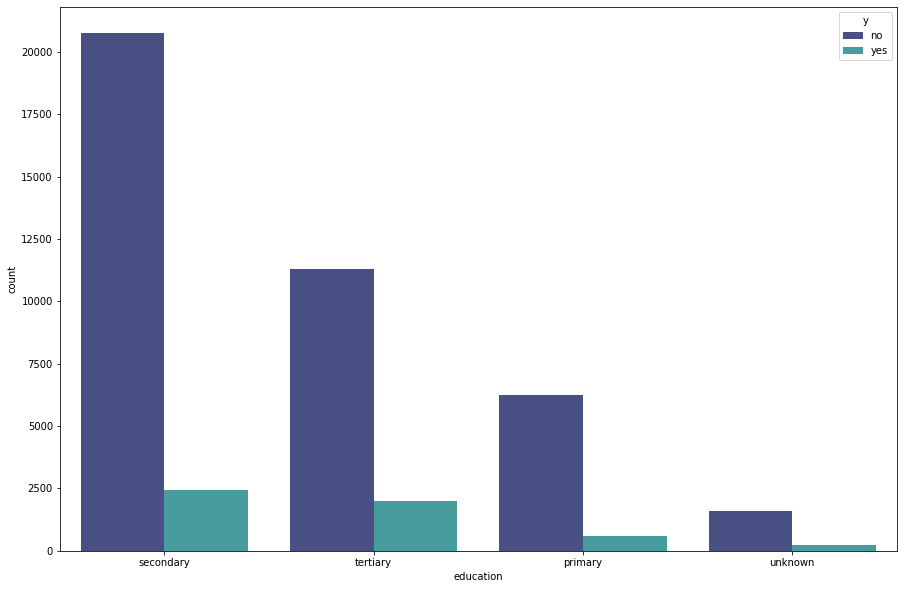

In [19]:
#histplot for visualising education and suscribed deposite or not
plt.figure(figsize=(15,10))
sns.countplot(x = 'education',order=bank_df['education'].value_counts().index,
              data = bank_df,hue='y',
              palette="mako")
plt.show()

Conclusion

1. From the above barplot we can conclude that when the customer education is tertiary and secondary
   then there is a high possibility that client suscribe a term deposite hence bank should approch mostly 
   to the tertiary and secondary class education client to suscribe for term deposite.

2. When the education of the customer is unknown and primary those client have very low possibility
   to suscribe for term deposite.

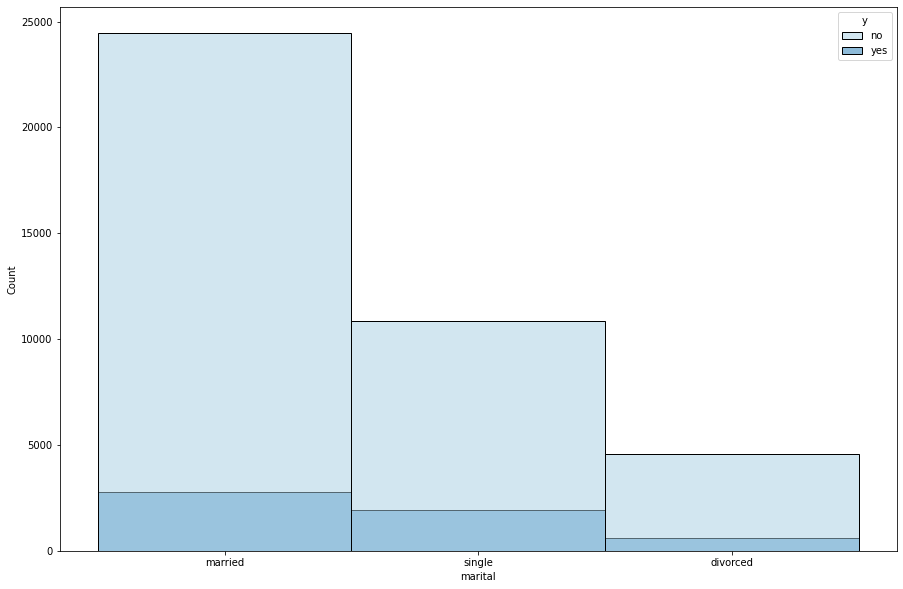

In [20]:
#histplot for visualising marital and suscribed deposite or not
plt.figure(figsize=(15,10))
sns.histplot(x = 'marital',
              data = bank_df,
              palette="Paired",hue='y')
plt.show()

Conclusion
1. Most of the clients who are married and single had suscribed for the term deposite therefore , When marital status of client is 'Single' and 'married' then there are high possibility that those clients suscribe a term deposite.Bank should target 'single' and 'married' client both to suscribe for term deposite.

2. when clients marital status was devorced those clients did not suscribe for the term deposite much thats why , When the client marital status is divorced then there is very less chance that these clients agrees to suscribe for term deposite.

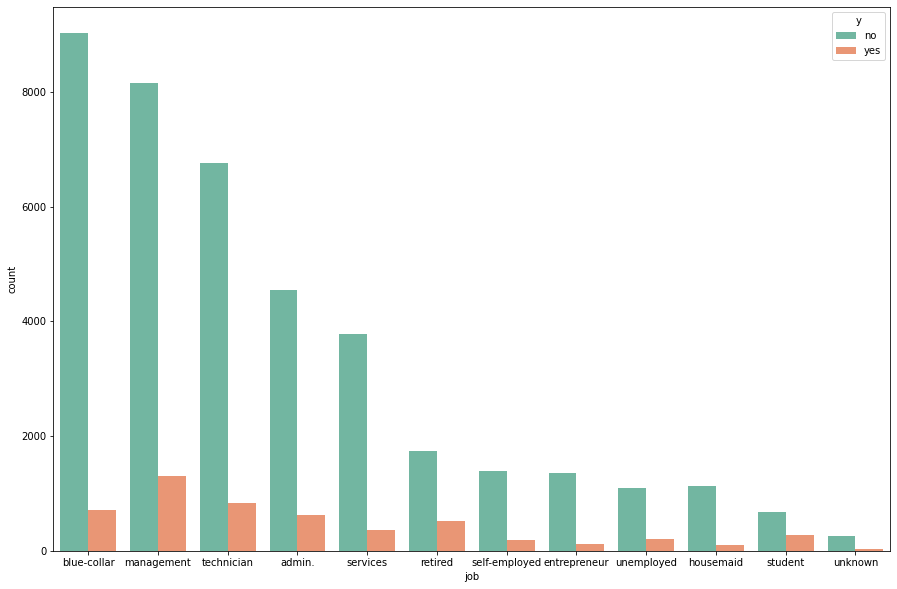

In [21]:
#histplot for visualising job and suscribed deposite or not
plt.figure(figsize=(15,10))
sns.countplot(x = 'job',
              data = bank_df,order=bank_df['job'].value_counts().index
              ,palette="Set2",hue='y')
plt.show()

Conclusion
1. Most of clients are from the job called as 'blue collar,managment,technician and admin,when the client jobs are Managment , technisian, blue_collar, admin services the there is high chance that those customers suscribe for term deposity so that bank should prefer salaried persons most to approach for term deposite.

2. when the client is retired person we can see high probablity  to suscribe term deposite
   hence retired client has high possibility that they suscribe for term deposite bank should cummunicate mostly to retired person to suscribe for term deposite.

3. when a clients are self employed and entrepreneur we can see less probablity  for suscribe to term deposite as well as when a clients have a category housmaid , unemployed and student and unknows there 
are least possibility that those customers agree to suscribe for term deposite.

# Feature Engineering

In [22]:
#converting job column into 4 categories
def cluster_job(job):
    cat_1=['blue-collar','management','technician','admin.','services']
    cat_2=['retired']
    cat_3=['self-employed','entrepreneur']
    cat_4=['unemployed','housemaid','student','unknown']

    if job in cat_1 :
       return 'cat1'
    if job in cat_2 :
       return 'cat2'
    if job in cat_3 :
       return 'cat3'
    if job in cat_4 :
       return 'cat4'
    return job

In [23]:
#appling function
bank_df['new_jobs']=bank_df['job'].apply(cluster_job)

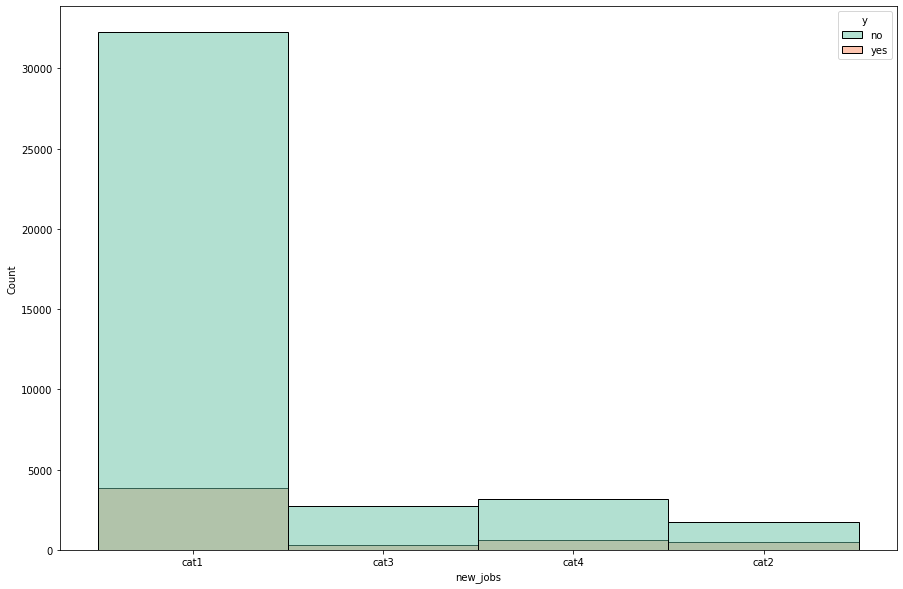

In [24]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'new_jobs',
              data = bank_df
              ,palette="Set2",hue='y')
plt.show()

Conclusion 

1. from the above histplot we can conclude that when the clients job in  cat 1 then those client 
  had suscribed for the term deposite often.

2. When the clients job category is in cat3 then there is very less possibility that clients will suscribe to term deposite.

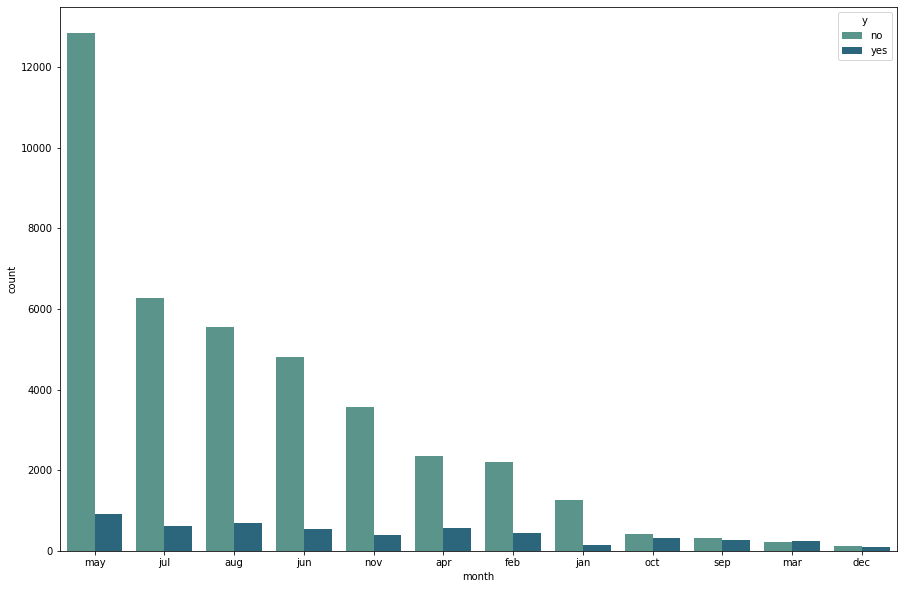

In [25]:
#hist plot for cheaking in which month clients mostly suscribe for term deposite
plt.figure(figsize=(15,10))
sns.countplot(x = 'month',
              data = bank_df,order=bank_df['month'].value_counts().index,
              hue='y',palette="crest")
plt.show()

Conclusion
1. Most of the client suscribed  term deposite  from april to august months period So Bank should 
   start marketing campaign and promotion in that months.

2. In the month of dec,jan,feb,mar very less clients suscribed for term deposite.

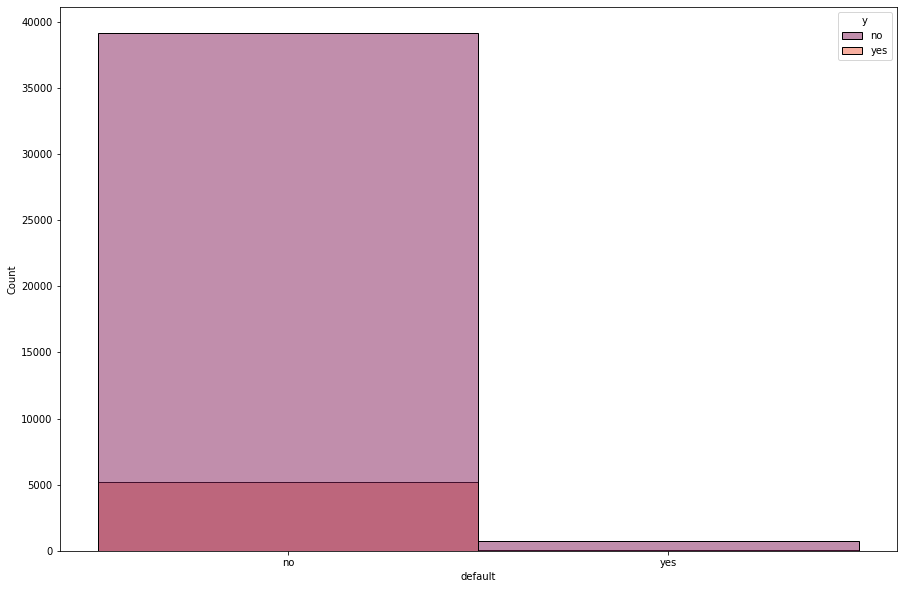

In [26]:
#cheking possibility to suscribe for term deposite when the client has credit default
plt.figure(figsize=(15,10))
sns.histplot(x = 'default',
              data = bank_df,
              hue='y',palette="rocket")
plt.show()

Conclusion

1. Most of the clients in our dataset was not credit defaulter so that when the client has credit is not in default then there is high possibility that customer suscribe for term deposite.

2. when the client is credit default there is very less possibility that a customer suscribe for term deposite.

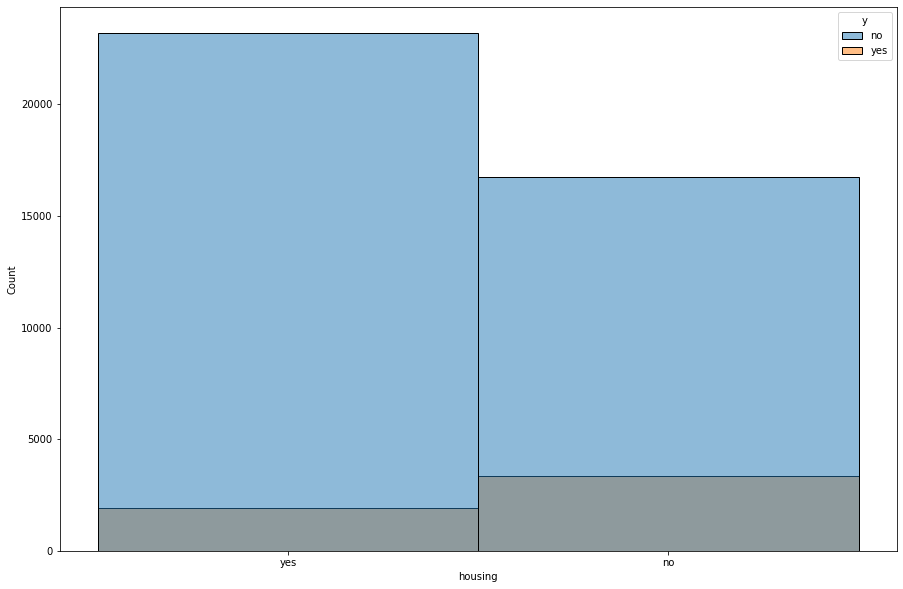

In [27]:
#cheking possibility to suscribe for term deposite when the client has housing loan
plt.figure(figsize=(15,10))
sns.histplot(x = 'housing',
              data = bank_df,
              hue='y',palette="tab10")
plt.show()

Conclusion
1. Most of the client has no housing loan had suscribed for term deposite hence the possibility when the
   client has no housing loan is high to suscribe for a term deposite.

2. When the client has housing loan the possibility that those client suscribe for term deposite is v less as compared to clients does not having housing loan.

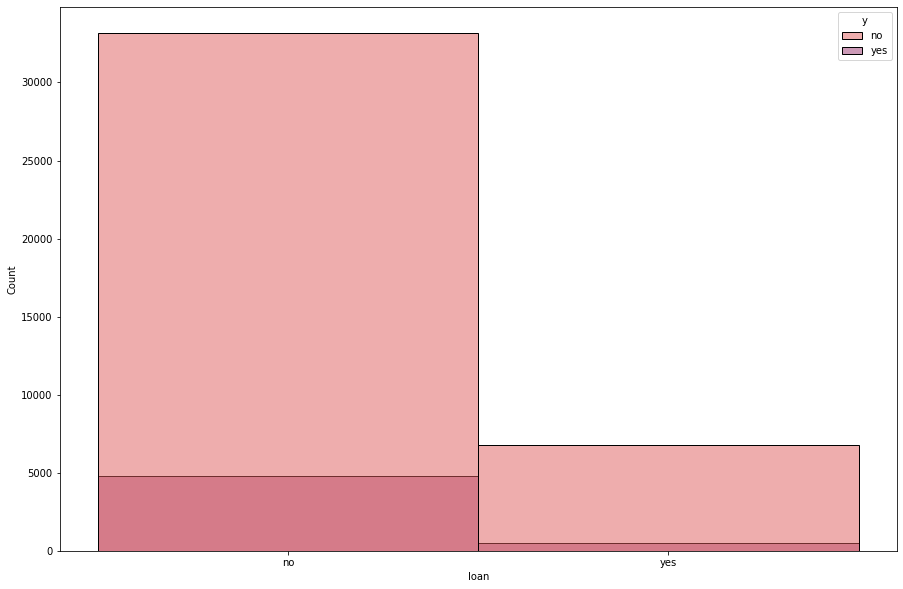

In [28]:
#cheking possibility to suscribe for term deposite when the client has personal loan
plt.figure(figsize=(15,10))
sns.histplot(x = 'loan',
              data = bank_df,
              hue='y',palette="flare")
plt.show()

Conclusion
1. Most of the client has no personal  loan had suscribed for term deposite hence the possibility when the
   client has no personal loan is high to suscribe for a term deposite.

2. When the client has personal  loan the possibility that those client suscribe for term deposite is  less as compared to clients does not having housing loan.

# Feature engineering

In [29]:
# converting age column to categorical column by assinging categories
def convert_age(age):
  if age < 25 :
     return 'struggling'
  elif age < 48 :
     return 'stable'
  elif age < 57 :
     return 'about to retire'
  elif age < 72:
     return 'old age'
  else: 
     return 'counting a last breathe'

In [30]:
#appling function
bank_df["age_cat"]=bank_df["age"].apply(lambda age : convert_age(age))

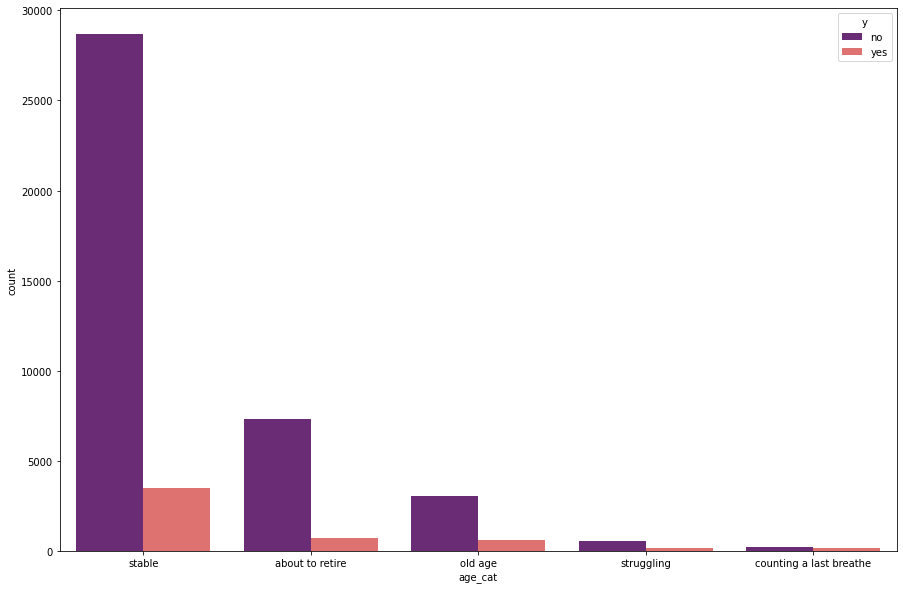

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'age_cat',
              data = bank_df,order=bank_df['age_cat'].value_counts().index,
              hue='y',palette="magma")
plt.show()

Conclusion 
1. from the above plot we can conclude that when the client age categories are 'stable' ,'old age' and
   'about to retire' then their is very high possibilty that those category person suscribe for a term 
    deposite.

2.when clients category is strugling and counting last breathe then there is very less possibility that a customer suscribe for term deposite.

## Analysis of numeric variable

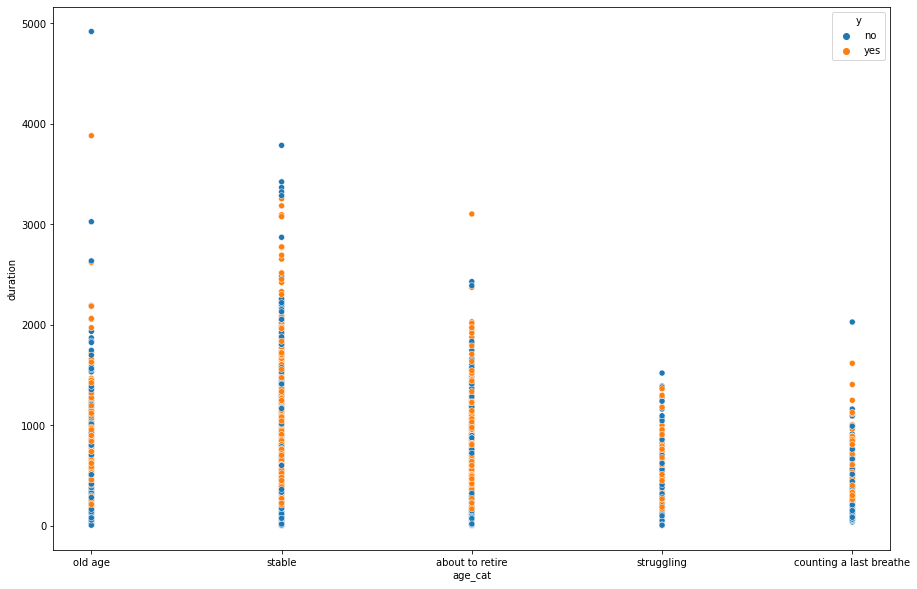

In [32]:
#scatterplot for duration
plt.figure(figsize=(15,10))
sns.scatterplot(data=bank_df, x="age_cat",y='duration',hue='y')

Conclusion 
From the above scatter plot we can conclude that when the age categories are old_age and stable the duration of communication is more and when the duration is high then tehre is high possibility that clients will suscribe for term deposite.

conclusion

1.From the above scatterplot we can conclude that when the contact duration is from 300 to 2000 and 
  client balance is in the middle range 500-35000 then those clients suscribe for term deposite mostly.

# Distribution of contineous numeric features

In [33]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,new_jobs,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,cat1,old age
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,cat1,stable
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,cat3,stable
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,cat1,stable
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,cat4,stable


In [34]:
plt.figure(figsize=(15,10))
sns.distplot(x= bank_df.pdays)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Conclusion 
From the above plot we can see that the pdays have most of the values are 0 and less than 0 so we have to drop that column for better prediction of our model

:# Frequency count encoding for month column

In [35]:
bank_df.month.value_counts().to_dict()

{'apr': 2932,
 'aug': 6247,
 'dec': 214,
 'feb': 2649,
 'jan': 1403,
 'jul': 6895,
 'jun': 5341,
 'mar': 477,
 'may': 13766,
 'nov': 3970,
 'oct': 738,
 'sep': 579}

In [36]:
# And now let's replace each label in months by its count

# first we make a dictionary that maps each label to the counts
bank_df_frequency_map = bank_df.month.value_counts().to_dict()

In [37]:
bank_df.month = bank_df.month.map(bank_df_frequency_map)

bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,new_jobs,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,13766,261,1,-1,0,unknown,no,cat1,old age
1,44,technician,single,secondary,no,29,yes,no,unknown,5,13766,151,1,-1,0,unknown,no,cat1,stable
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,13766,76,1,-1,0,unknown,no,cat3,stable
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,13766,92,1,-1,0,unknown,no,cat1,stable
4,33,unknown,single,unknown,no,1,no,no,unknown,5,13766,198,1,-1,0,unknown,no,cat4,stable
5,35,management,married,tertiary,no,231,yes,no,unknown,5,13766,139,1,-1,0,unknown,no,cat1,stable
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,13766,217,1,-1,0,unknown,no,cat1,stable
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,13766,380,1,-1,0,unknown,no,cat3,stable
8,58,retired,married,primary,no,121,yes,no,unknown,5,13766,50,1,-1,0,unknown,no,cat2,old age
9,43,technician,single,secondary,no,593,yes,no,unknown,5,13766,55,1,-1,0,unknown,no,cat1,stable


In [38]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,new_jobs,age_cat
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,3970,977,3,-1,0,unknown,yes,cat1,about to retire
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,3970,456,2,-1,0,unknown,yes,cat2,old age
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,3970,1127,5,184,3,success,yes,cat2,counting a last breathe
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,3970,508,4,-1,0,unknown,no,cat1,old age
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,3970,361,2,188,11,other,no,cat3,stable


In [39]:
#droppping colums because we have extracted new features from that columns
bank_df.drop(columns=['age','pdays','duration','job'],axis=1,inplace=True)

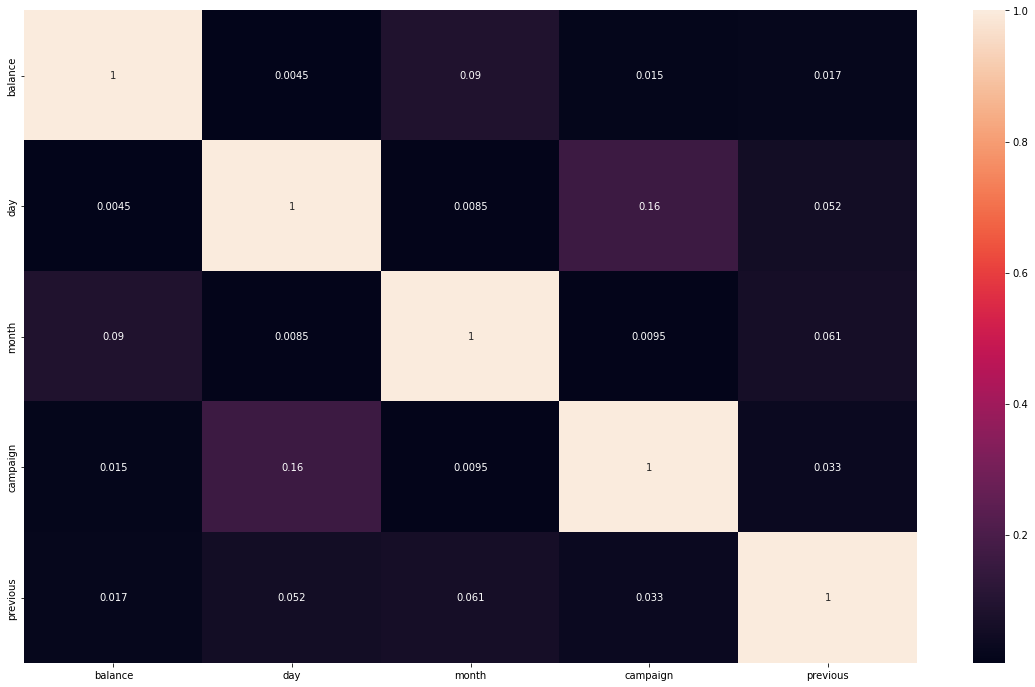

In [40]:
# Plotting correlation matrix
plt.subplots(figsize=(20,12))
sns.heatmap(bank_df.corr().abs(), annot=True)

In [41]:
bank_df.head()

,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,new_jobs,age_cat
0,married,tertiary,no,2143,yes,no,unknown,5,13766,1,0,unknown,no,cat1,old age
1,single,secondary,no,29,yes,no,unknown,5,13766,1,0,unknown,no,cat1,stable
2,married,secondary,no,2,yes,yes,unknown,5,13766,1,0,unknown,no,cat3,stable
3,married,unknown,no,1506,yes,no,unknown,5,13766,1,0,unknown,no,cat1,stable
4,single,unknown,no,1,no,no,unknown,5,13766,1,0,unknown,no,cat4,stable


In [42]:
#converting those features into binary class numeric features
bank_df["default"]=bank_df["default"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["housing"]=bank_df["housing"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["loan"]=bank_df["loan"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["y"]=bank_df["y"].apply(lambda x : 1 if x=='yes' else 0)


In [43]:
#cheking they are converted or not
bank_df.head()

,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,new_jobs,age_cat
0,married,tertiary,0,2143,1,0,unknown,5,13766,1,0,unknown,0,cat1,old age
1,single,secondary,0,29,1,0,unknown,5,13766,1,0,unknown,0,cat1,stable
2,married,secondary,0,2,1,1,unknown,5,13766,1,0,unknown,0,cat3,stable
3,married,unknown,0,1506,1,0,unknown,5,13766,1,0,unknown,0,cat1,stable
4,single,unknown,0,1,0,0,unknown,5,13766,1,0,unknown,0,cat4,stable


# Preparing data to fit machine learning model

In [44]:
#Creating dummy variable for categorical variables- season, month, weekofdays, year, holidays, functional day
marital = pd.get_dummies(bank_df['marital'],prefix='marital')
contact = pd.get_dummies(bank_df['contact'], prefix='contact')
poutcome = pd.get_dummies(bank_df['poutcome'], prefix = 'poutcome')
age_cat = pd.get_dummies(bank_df['age_cat'],prefix = 'age_cat')
new_jobs = pd.get_dummies(bank_df['new_jobs'],prefix = 'new_job')
education = pd.get_dummies(bank_df['education'],prefix = 'educaton')




In [45]:
bank_df = pd.concat([bank_df,marital,contact,poutcome,age_cat,new_jobs,education],axis=1)

In [46]:
bank_df.columns

Index(['marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'campaign', 'previous', 'poutcome', 'y',
       'new_jobs', 'age_cat', 'marital_divorced', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'age_cat_about to retire',
       'age_cat_counting a last breathe', 'age_cat_old age', 'age_cat_stable',
       'age_cat_struggling', 'new_job_cat1', 'new_job_cat2', 'new_job_cat3',
       'new_job_cat4', 'educaton_primary', 'educaton_secondary',
       'educaton_tertiary', 'educaton_unknown'],
      dtype='object')

In [47]:
#dropping duplicate features
bank_df.drop(['marital','contact','poutcome','age_cat','new_jobs','education'],axis=1,inplace=True)

In [48]:
bank_df.columns

Index(['default', 'balance', 'housing', 'loan', 'day', 'month', 'campaign',
       'previous', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'age_cat_about to retire',
       'age_cat_counting a last breathe', 'age_cat_old age', 'age_cat_stable',
       'age_cat_struggling', 'new_job_cat1', 'new_job_cat2', 'new_job_cat3',
       'new_job_cat4', 'educaton_primary', 'educaton_secondary',
       'educaton_tertiary', 'educaton_unknown'],
      dtype='object')

In [49]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [50]:
#cheaking multicolliniarity for each feature
calc_vif(bank_df[[i for i in bank_df.describe().columns if i not in ['y',]]])


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,default,1.012728
1,balance,1.034812
2,housing,1.293345
3,loan,1.031227
4,day,1.037336
5,month,1.396086
6,campaign,1.045396
7,previous,1.412182
8,marital_divorced,inf
9,marital_married,inf


## Splitting Dependent and Independent Variables

In [51]:
#seprating our dependent and independent features
y=(bank_df['y'])
x=bank_df.drop(columns=['y'],axis=1)

In [52]:
x.head()

,default,balance,housing,loan,day,month,campaign,previous,marital_divorced,marital_married,...,age_cat_stable,age_cat_struggling,new_job_cat1,new_job_cat2,new_job_cat3,new_job_cat4,educaton_primary,educaton_secondary,educaton_tertiary,educaton_unknown
0,0,2143,1,0,5,13766,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,29,1,0,5,13766,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0,2,1,1,5,13766,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,0,1506,1,0,5,13766,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0,1,0,0,5,13766,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [53]:
x.columns

Index(['default', 'balance', 'housing', 'loan', 'day', 'month', 'campaign',
       'previous', 'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_cat_about to retire',
       'age_cat_counting a last breathe', 'age_cat_old age', 'age_cat_stable',
       'age_cat_struggling', 'new_job_cat1', 'new_job_cat2', 'new_job_cat3',
       'new_job_cat4', 'educaton_primary', 'educaton_secondary',
       'educaton_tertiary', 'educaton_unknown'],
      dtype='object')

# SMOTE Oversampling for handling class imbalance

In [54]:
#Dependent variable business treatment - Smote oversampling

In [55]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
X ,y = sampler.fit_resample(x,y)

In [56]:
#Original length and Resampled Length
print('Original Dataset length',len(x))
print('Resamped Dataset length',len(X))

Original Dataset length 45211
Resamped Dataset length 79844


# Train and Test Split

In [57]:
#loading required libraries and performing train test split by 75-25 ratio
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, log_loss, precision_score, f1_score
from sklearn import metrics

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify = y)
print('train features shape:',X_train.shape)
print('test features shape:',X_test.shape)
print('train label shape:',y_train.shape)
print('test label shape:',y_test.shape)

train features shape: (59883, 31)
test features shape: (19961, 31)
train label shape: (59883,)
test label shape: (19961,)


In [58]:
# Lets define a function for Evaluation metrics so that we can reuse it again and again
def print_metrics(actual,prediction,model=''):
  print(f'{model} Test accuracy Score', accuracy_score(actual,prediction))
  print(classification_report(actual,prediction))
  
  return confusion_matrix(actual,prediction)

#Applying K_nearest Neighbour Machine learing Algorithem

In [59]:
#applying k-nearent neighbour
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
cv_score = cross_val_score(knn,X_train,y_train,cv=5)

y_pred_knn=knn.predict(X_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_knn,'KNN')

Cross_validation score [0.76655256 0.7773232  0.77723971 0.78239813 0.7752171 ]
KNN Test accuracy Score 0.7889885276288763
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      9981
           1       0.75      0.87      0.80      9980

    accuracy                           0.79     19961
   macro avg       0.80      0.79      0.79     19961
weighted avg       0.80      0.79      0.79     19961



array([[7080, 2901],
       [1311, 8669]])

[[7080 2901]
 [1311 8669]]


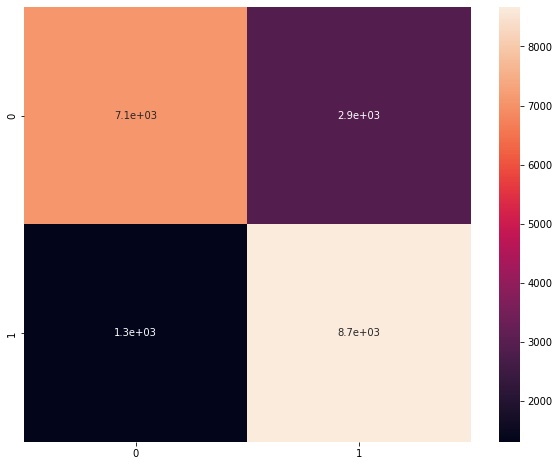

In [60]:
#Get the confusion matrix
plt.figure(figsize=(10,8))
cf_matrix = confusion_matrix(y_test, y_pred_knn)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

# Applying Random forest Classifier machine Learning Algorithem

In [61]:
#applying random forest algorithem
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(max_depth = 8, n_estimators = 200)
rf_reg.fit(X_train,y_train)
cv_score = cross_val_score(rf_reg,X_train,y_train,cv=5)

y_pred_rf=rf_reg.predict(X_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_rf,'RandomForest')

Cross_validation score [0.89997495 0.90030893 0.89922351 0.8995491  0.90405812]
RandomForest Test accuracy Score 0.9070186864385552
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      9981
           1       0.95      0.86      0.90      9980

    accuracy                           0.91     19961
   macro avg       0.91      0.91      0.91     19961
weighted avg       0.91      0.91      0.91     19961



array([[9533,  448],
       [1408, 8572]])

[[9533  448]
 [1408 8572]]


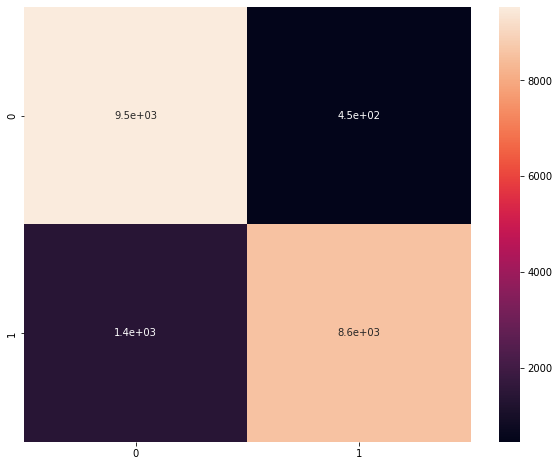

In [62]:
#Get the confusion matrix
plt.figure(figsize=(10,8))
cf_matrix = confusion_matrix(y_test,y_pred_rf)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

# Applying XG boost classifier

In [63]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 8, n_estimators = 200)
xgb.fit(X_train,y_train)
cv_score = cross_val_score(xgb,X_train,y_train,cv=5)

y_pred_xgb=xgb.predict(X_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_xgb,'xgb')

Cross_validation score [0.93186942 0.93270435 0.93170243 0.9261022  0.93470274]
xgb Test accuracy Score 0.9356244677120384
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9981
           1       0.97      0.90      0.93      9980

    accuracy                           0.94     19961
   macro avg       0.94      0.94      0.94     19961
weighted avg       0.94      0.94      0.94     19961



array([[9734,  247],
       [1038, 8942]])

[[9734  247]
 [1038 8942]]


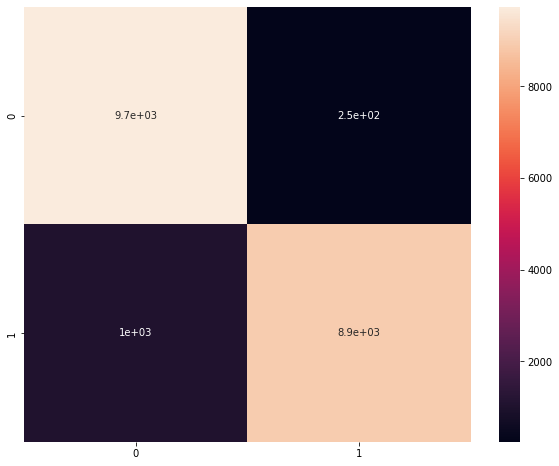

In [64]:
#Get the confusion matrix
plt.figure(figsize=(10,8))
cf_matrix = confusion_matrix(y_test,y_pred_xgb)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

# Hyperparameter Tuning for xgboost classifier

In [65]:
#hyperparameter tuning
params={
'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth'     : [3,4,5,6,8,10,12,15],
'min_child_weight' : [1,3,5,7],
'gamma'          :[0.0,0.1,0.2,0.3,0.4],
'colsample_bytree' : [0.3,0.4,0.5,0.7]

}

In [66]:
from sklearn.model_selection import RandomizedSearchCV
classifier=XGBClassifier()
xgb_hypertuned=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,random_state=1)
xgb_hypertuned.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=1, scoring='roc_auc', verbose=3)

In [67]:
xgb_hypertuned.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15,
              min_child_weight=7)

In [68]:
xgb_hypertuned.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.3,
 'max_depth': 15,
 'min_child_weight': 7}

In [69]:
#loading libraries
from xgboost import XGBClassifier
xgb_hyp=XGBClassifier(colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=15,
              min_child_weight=7)


In [70]:
from sklearn.model_selection import cross_val_score
xgb_hyp.fit(X_train,y_train)
score=cross_val_score(xgb_hyp,X_train,y_train,cv=10)
y_pred_xgb_hypertuned = xgb_hypertuned.predict(X_test)
print('Cross_validation score',score)
print_metrics(y_test,y_pred_xgb_hypertuned,'xgb_hypertuned')

Cross_validation score [0.93137419 0.93454667 0.93270997 0.93737475 0.93269873 0.93102872
 0.92334669 0.93036072 0.93670675 0.93219773]
xgb_hypertuned Test accuracy Score 0.9358749561645208
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9981
           1       0.97      0.90      0.93      9980

    accuracy                           0.94     19961
   macro avg       0.94      0.94      0.94     19961
weighted avg       0.94      0.94      0.94     19961



array([[9663,  318],
       [ 962, 9018]])

[[9663  318]
 [ 962 9018]]


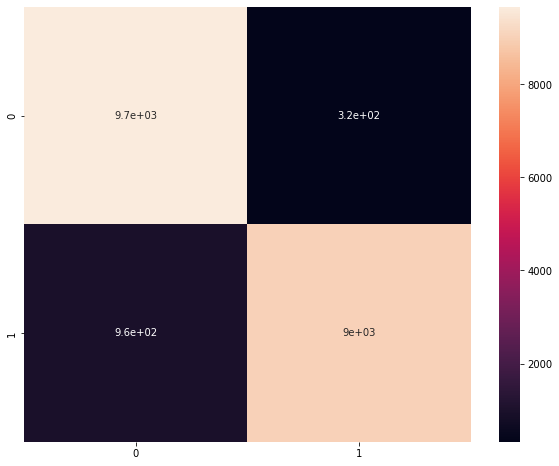

In [71]:
#Get the confusion matrix
plt.figure(figsize=(10,8))
cf_matrix = confusion_matrix(y_test,y_pred_xgb_hypertuned)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

# Feature Importance For Prediction

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

# Prediction probabilities

In [73]:
knn_probs = knn.predict_proba(X_test)
rf_reg_probs = rf_reg.predict_proba(X_test)
xgb_probs = xgb.predict_proba(X_test)
xgb_hyp_probs = xgb_hyp.predict_proba(X_test)



Probabilities for the positive outcome is kept.

In [74]:
knn_probs = knn_probs[:, 1]
rf_reg_probs = rf_reg_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
xgb_hyp_probs = xgb_hyp_probs[:, 1]



# Computing AUROC and ROC curve values

Calculate AUROC


ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [75]:
knn_auc = roc_auc_score(y_test, knn_probs)
rf_reg_auc = roc_auc_score(y_test, rf_reg_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
xgb_hyp_auc = roc_auc_score(y_test, xgb_hyp_probs)

# Print AUROC scores

In [76]:
print('k nearest neighbour: AUROC = %.3f' % (knn_auc))
print('Random Forest: AUROC = %.3f' % (rf_reg_auc))
print('xg boost: AUROC = %.3f' % (xgb_auc))
print('xg boost hypertuned: AUROC = %.3f' % (xgb_hyp_auc))


k nearest neighbour: AUROC = 0.868
Random Forest: AUROC = 0.958
xg boost: AUROC = 0.973
xg boost hypertuned: AUROC = 0.975


# Calculate ROC curve

In [77]:
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
rf_reg_fpr, rf_reg_tpr, _ = roc_curve(y_test, rf_reg_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_hyp_fpr, xgb_hyp_tpr, _ = roc_curve(y_test, xgb_hyp_probs)

## Plot the ROC curve

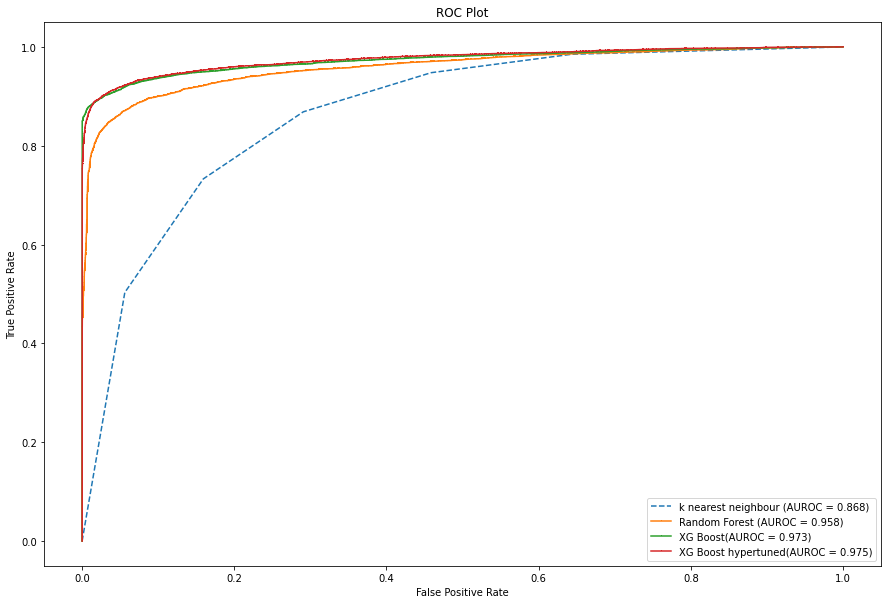

In [78]:
plt.figure(figsize=(15,10))
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='k nearest neighbour (AUROC = %0.3f)' % knn_auc)
plt.plot(rf_reg_fpr, rf_reg_tpr, marker=',', label='Random Forest (AUROC = %0.3f)' % rf_reg_auc)
plt.plot(xgb_fpr, xgb_tpr, marker=',', label='XG Boost(AUROC = %0.3f)' % xgb_auc)
plt.plot(xgb_hyp_fpr, xgb_hyp_tpr, marker=',', label='XG Boost hypertuned(AUROC = %0.3f)' % xgb_hyp_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Feature Importance For Prediction

# Shapash Model Explanatory

In [79]:
!pip install shapash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
from shapash.explainer.smart_explainer import SmartExplainer

In [81]:
xpl = SmartExplainer(xgb)

In [82]:
xpl.compile(
    x=X_test)

In [83]:
xpl

In [84]:
app = xpl.run_app(title_story='bank_dataset')

/usr/local/lib/python3.7/dist-packages/shapash/webapp/smart_app.py:309: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://af4b220df520:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)


In [85]:
app.kill()

 * Environment: production


In [86]:
xpl.plot.features_importance()

In [87]:
predictor = xpl.to_smartpredictor()

In [88]:
predictor.save('./predictor.pkl')

In [89]:
from shapash.utils.load_smartpredictor import load_smartpredictor
predictor_load = load_smartpredictor('./predictor.pkl')

In [90]:
predictor_load.add_input(x=X, ypred=y)

In [91]:
detailed_contributions = predictor_load.detail_contributions()

In [92]:
predictor_load.modify_mask(max_contrib=4)

In [93]:
explanation = predictor_load.summarize()

In [94]:
explanation.sample(8)

,y,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4
24131,1,0.359549,contact_unknown,1.0,-1.806718,month,3970.0,1.152176,poutcome_unknown,1.0,-1.134157,marital_married,1.0,-1.073387
31337,1,0.674307,month,477.0,1.717973,marital_married,1.0,-1.225222,poutcome_unknown,1.0,-0.881652,educaton_secondary,1.0,-0.660805
78422,1,0.999649,poutcome_unknown,0.0,1.126443,educaton_secondary,0.0,1.035594,marital_divorced,0.0,0.984611,marital_married,0.0,0.880952
26051,0,0.969849,poutcome_failure,1.0,2.439409,marital_married,1.0,1.128515,educaton_tertiary,1.0,0.85793,month,3970.0,0.684398
11271,0,0.948642,contact_unknown,1.0,2.304229,poutcome_unknown,1.0,1.119648,marital_divorced,1.0,0.986532,educaton_tertiary,1.0,0.856939
30223,0,0.822972,poutcome_failure,1.0,2.164724,marital_single,1.0,0.737654,new_job_cat3,1.0,0.726543,educaton_tertiary,1.0,0.720487
44106,1,0.132657,marital_single,1.0,-1.274442,educaton_secondary,1.0,-1.112333,poutcome_unknown,1.0,-1.071619,marital_married,0.0,0.507189
44021,1,0.279875,marital_single,1.0,-1.337413,educaton_secondary,1.0,-1.084697,poutcome_unknown,1.0,-0.960901,month,5341.0,0.73945


Conclusion
